In [1]:
# ============================================================
# 📌 CELL 1 — Upload Dataset & Load ke DataFrame
# ============================================================

from google.colab import files
import pandas as pd
from IPython.display import display, HTML

# ---- Judul bagian ----
display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 1 — Upload & Load Dataset</h2>
<p style="margin-top:0; color:#555;">
Upload file <b>.csv</b>
</p>
<hr>
"""))

# ---- Upload file ----
uploaded = files.upload()
csv_files = [fn for fn in uploaded.keys() if fn.lower().endswith(".csv")]
if len(csv_files) == 0:
    raise ValueError("Tidak ada file .csv yang diupload. Upload dataset dalam format CSV ya.")
file_name = csv_files[0]

# ---- Load dataset ----
df = pd.read_csv(file_name)

# ---- Output ----
display(HTML(f"""
<h3 style="margin:12px 0 6px 0;">✅ Dataset berhasil dimuat</h3>
<ul style="margin-top:0; color:#333;">
  <li><b>Nama file:</b> {file_name}</li>
  <li><b>Jumlah baris:</b> {df.shape[0]:,}</li>
  <li><b>Jumlah kolom:</b> {df.shape[1]:,}</li>
</ul>
<hr>
"""))

# ---- Preview tabel ----
display(HTML("<h3 style='margin:12px 0 6px 0;'>👀 Preview 5 Baris Pertama</h3>"))
display(
    df.head(5).style
      .set_caption("Tabel 1. Preview Dataset (5 baris pertama)")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"),
                     ("font-size", "14px"),
                     ("font-weight", "600"),
                     ("color", "#222"),
                     ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#f3f4f6"),
                     ("color", "#111"),
                     ("font-weight", "700"),
                     ("border", "1px solid #e5e7eb"),
                     ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #e5e7eb"),
                     ("padding", "8px"),
                     ("color", "#222")]}
      ])
)

# ---- Nama kolom ----
display(HTML("<h3 style='margin:14px 0 6px 0;'>🧾 Daftar Kolom</h3>"))
display(pd.DataFrame({"Kolom": df.columns}).style.hide(axis="index"))


Saving Campus Recruitment.csv to Campus Recruitment.csv


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.000000,Internasional,91.000000,Internasional,Commerce,58.000000,Sci&Tech,No,55.000000,Mkt&HR,58.800000,Placed,5400000.000000
1,2,M,79.330000,Negeri,78.330000,Negeri,Science,77.480000,Sci&Tech,Yes,86.500000,Mkt&Fin,66.280000,Placed,4000000.000000
2,3,M,65.000000,Negeri,68.000000,Swasta,Arts,64.000000,Comm&Mgmt,No,75.000000,Mkt&Fin,57.800000,Placed,5000000.000000
3,4,M,56.000000,Negeri,52.000000,Swasta,Science,52.000000,Sci&Tech,No,66.000000,Mkt&HR,59.430000,Not Placed,nan
4,5,M,85.800000,Negeri,73.600000,Negeri,Commerce,73.300000,Comm&Mgmt,No,96.800000,Mkt&Fin,55.500000,Placed,8500000.000000


Kolom
ID
Jenis Kelamin
Nilai rata-rata SMP
Lembaga pendidikan kelas 10
Nilai rata-rata SMA
Lembaga pendidikan kelas 12
Jurusan saat SMA
IPK
Program studi sarjana
Pengalaman kerja sebelum lulus


Kolom,Tipe Data,Jumlah Unik
ID,int64,215
Jenis Kelamin,object,4
Nilai rata-rata SMP,float64,103
Lembaga pendidikan kelas 10,object,3
Nilai rata-rata SMA,float64,97
Lembaga pendidikan kelas 12,object,3
Jurusan saat SMA,object,3
IPK,float64,89
Program studi sarjana,object,3
Pengalaman kerja sebelum lulus,object,2


Kolom,Missing Count,Missing (%)
Gaji,67,31.16%
Nilai tes kemampuan kerja,6,2.79%
Nilai rata-rata SMP,2,0.93%
Jenis Kelamin,1,0.47%
Nilai rata-rata SMA,1,0.47%


Kelas,Jumlah,Persentase
Placed,148,68.84%
Not Placed,67,31.16%


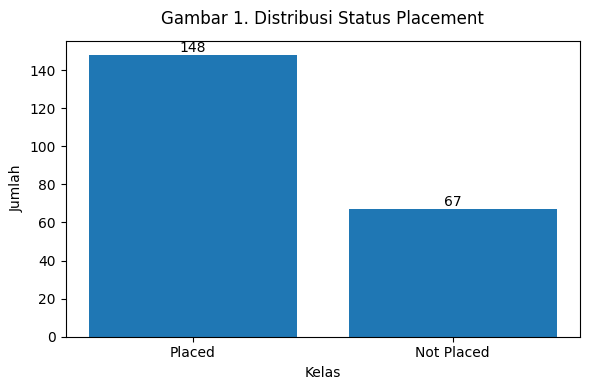

In [2]:
# ============================================================
# 📌 CELL 2 — Data Overview: Tipe Data, Missing Values, & Target Distribution
# ============================================================

import numpy as np
from IPython.display import display, HTML

# ---- Judul bagian ----
display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 2 — Data Overview</h2>
<p style="margin-top:0; color:#555;">
Ringkasan struktur data: tipe data, missing values, dan distribusi target (Placed vs Not Placed).
</p>
<hr>
"""))

# ---- Deteksi kolom target ----
target_candidates = [c for c in df.columns if "status" in c.lower()]
if len(target_candidates) == 0:
    raise ValueError("Kolom target tidak ditemukan. Pastikan ada kolom yang mengandung kata 'status'.")
target_col = target_candidates[0]

display(HTML(f"""
<h3 style="margin:12px 0 6px 0;">🎯 Target yang digunakan</h3>
<p style="margin-top:0; color:#333;">
<b>{target_col}</b>
</p>
<hr>
"""))

# ---- Ringkasan tipe data dan jumlah nilai unik ----
overview = pd.DataFrame({
    "Kolom": df.columns,
    "Tipe Data": df.dtypes.astype(str),
    "Jumlah Unik": [df[c].nunique(dropna=True) for c in df.columns]
})

display(HTML("<h3 style='margin:12px 0 6px 0;'>🧠 Ringkasan Tipe Data & Jumlah Unik</h3>"))
display(
    overview.style
      .hide(axis="index")
      .set_caption("Tabel 2. Ringkasan Tipe Data & Jumlah Nilai Unik")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#f3f4f6"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #e5e7eb"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #e5e7eb"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# ---- Missing values ----
missing = (df.isna().sum()
           .sort_values(ascending=False)
           .reset_index())
missing.columns = ["Kolom", "Missing Count"]
missing["Missing (%)"] = (missing["Missing Count"] / len(df) * 100).round(2)

missing_nonzero = missing[missing["Missing Count"] > 0].copy()

display(HTML("<h3 style='margin:14px 0 6px 0;'>🧼 Missing Values</h3>"))
if missing_nonzero.empty:
    display(HTML("<p style='color:#2e7d32;'><b>Tidak ada missing values.</b></p>"))
else:
    display(
        missing_nonzero.style
          .hide(axis="index")
          .format({"Missing (%)": "{:.2f}%"})
          .set_caption("Tabel 3. Kolom dengan Missing Values")
          .set_table_styles([
              {"selector": "caption",
               "props": [("caption-side", "top"), ("font-size", "14px"),
                         ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
              {"selector": "th",
               "props": [("background-color", "#fff7ed"), ("color", "#111"),
                         ("font-weight", "700"), ("border", "1px solid #fed7aa"), ("padding", "8px")]},
              {"selector": "td",
               "props": [("border", "1px solid #fed7aa"), ("padding", "8px"), ("color", "#222")]}
          ])
    )

# ---- Distribusi target ----
target_counts = df[target_col].value_counts(dropna=False).reset_index()
target_counts.columns = ["Kelas", "Jumlah"]
target_counts["Persentase"] = (target_counts["Jumlah"] / target_counts["Jumlah"].sum() * 100).round(2)

display(HTML("<h3 style='margin:14px 0 6px 0;'>📊 Distribusi Target</h3>"))
display(
    target_counts.style
      .hide(axis="index")
      .format({"Persentase": "{:.2f}%"})
      .set_caption("Tabel 4. Distribusi Kelas Target")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#eef2ff"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #c7d2fe"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #c7d2fe"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# ---- Plot distribusi target ----
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.title("Gambar 1. Distribusi Status Placement", fontsize=12, pad=12)
plt.bar(target_counts["Kelas"].astype(str), target_counts["Jumlah"])
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
for i, v in enumerate(target_counts["Jumlah"]):
    plt.text(i, v + max(target_counts["Jumlah"])*0.01, str(v), ha='center', fontsize=10)
plt.tight_layout()
plt.show()


In [3]:
# ============================================================
# 📌 CELL 3 — Data Cleaning Awal & Menyiapkan X dan y
# ============================================================

import numpy as np
import pandas as pd
from IPython.display import display, HTML

# Judul bagian
display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 3 — Data Cleaning & Feature-Target Setup</h2>
<p style="margin-top:0; color:#555;">
Menghapus kolom yang tidak relevan/berpotensi leakage, menormalkan kategori, dan menyiapkan fitur (X) serta target (y).
</p>
<hr>
"""))

# Identifikasi kolom yang dikeluarkan dari fitur
drop_candidates = ["ID", "Gaji", "Salary"]
drop_cols = [c for c in df.columns if c in drop_candidates]

# Pastikan kolom target tidak ikut terbuang
if target_col in drop_cols:
    drop_cols.remove(target_col)

display(HTML("<h3 style='margin:12px 0 6px 0;'>🗑️ Kolom yang dikeluarkan dari fitur</h3>"))
if len(drop_cols) == 0:
    display(HTML("<p style='margin-top:0; color:#333;'>Tidak ada kolom buangan yang terdeteksi otomatis (ID/Gaji).</p><hr>"))
else:
    display(pd.DataFrame({"Kolom yang dibuang": drop_cols}).style.hide(axis="index"))
    display(HTML("<hr>"))

# Normalisasi kategori (jika kolom gender terdeteksi)
gender_cols = [c for c in df.columns if "jenis" in c.lower() or "gender" in c.lower()]
gender_col = gender_cols[0] if len(gender_cols) > 0 else None

display(HTML("<h3 style='margin:12px 0 6px 0;'>🧩 Normalisasi Kategori (jika ada)</h3>"))
if gender_col is None:
    display(HTML("<p style='margin-top:0; color:#333;'>Kolom gender tidak terdeteksi otomatis.</p><hr>"))
else:
    before_gender = df[gender_col].astype(str).replace("nan", np.nan).value_counts(dropna=False).reset_index()
    before_gender.columns = ["Kategori (sebelum)", "Jumlah"]

    df[gender_col] = df[gender_col].replace({
        "Male": "M", "Female": "F",
        "male": "M", "female": "F",
        "MALE": "M", "FEMALE": "F"
    })

    after_gender = df[gender_col].astype(str).replace("nan", np.nan).value_counts(dropna=False).reset_index()
    after_gender.columns = ["Kategori (sesudah)", "Jumlah"]

    gender_compare = pd.concat([before_gender, after_gender], axis=1)

    display(HTML(f"<p style='margin-top:0; color:#333;'>Kolom yang dinormalisasi: <b>{gender_col}</b></p>"))
    display(
        gender_compare.style
          .hide(axis="index")
          .set_caption("Tabel 5. Perbandingan Kategori Gender (Sebelum vs Sesudah Normalisasi)")
          .set_table_styles([
              {"selector": "caption",
               "props": [("caption-side", "top"), ("font-size", "14px"),
                         ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
              {"selector": "th",
               "props": [("background-color", "#f3f4f6"), ("color", "#111"),
                         ("font-weight", "700"), ("border", "1px solid #e5e7eb"), ("padding", "8px")]},
              {"selector": "td",
               "props": [("border", "1px solid #e5e7eb"), ("padding", "8px"), ("color", "#222")]}
          ])
    )
    display(HTML("<hr>"))

# Menyiapkan target (y) dan fitur (X)
y = (df[target_col].astype(str).str.strip().str.lower() == "placed").astype(int)
X = df.drop(columns=[target_col] + drop_cols, errors="ignore")

# Ringkasan hasil setup
display(HTML("<h3 style='margin:12px 0 6px 0;'>✅ Hasil Setup Feature & Target</h3>"))

summary = pd.DataFrame({
    "Item": ["Jumlah observasi", "Jumlah fitur (X)", "Kolom target", "Placed (1)", "Not Placed (0)"],
    "Nilai": [
        X.shape[0],
        X.shape[1],
        target_col,
        int((y == 1).sum()),
        int((y == 0).sum())
    ]
})

display(
    summary.style
      .hide(axis="index")
      .set_caption("Tabel 6. Ringkasan Data untuk Modeling")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#ecfeff"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #a5f3fc"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #a5f3fc"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# Ringkasan fitur numerik dan kategorikal
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

cols_info = pd.DataFrame({
    "Tipe Fitur": ["Numerik", "Kategorikal"],
    "Jumlah Kolom": [len(num_cols), len(cat_cols)],
    "Contoh Kolom": [
        ", ".join(num_cols[:5]) + (" ..." if len(num_cols) > 5 else ""),
        ", ".join(cat_cols[:5]) + (" ..." if len(cat_cols) > 5 else "")
    ]
})

display(HTML("<h3 style='margin:14px 0 6px 0;'>🧾 Komposisi Fitur</h3>"))
display(
    cols_info.style
      .hide(axis="index")
      .set_caption("Tabel 7. Ringkasan Fitur Numerik vs Kategorikal")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#fef9c3"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #fde68a"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #fde68a"), ("padding", "8px"), ("color", "#222")]}
      ])
)

display(HTML("<hr><p style='color:#555; margin-top:0;'>Tahap berikutnya: membuat preprocessing pipeline dan membagi data (train/test) dengan stratifikasi.</p>"))


Kolom yang dibuang
ID
Gaji


Kategori (sebelum),Jumlah,Kategori (sesudah),Jumlah
M,132,M,139.000000
F,73,F,75.000000
Male,7,nan,1.000000
Female,2,nan,nan
nan,1,nan,nan


Item,Nilai
Jumlah observasi,215
Jumlah fitur (X),12
Kolom target,status kelulusan (Bekerja/Belum)
Placed (1),148
Not Placed (0),67


Tipe Fitur,Jumlah Kolom,Contoh Kolom
Numerik,5,"Nilai rata-rata SMP, Nilai rata-rata SMA, IPK, Nilai tes kemampuan kerja, Nilai rata-rata pascasarjana"
Kategorikal,7,"Jenis Kelamin, Lembaga pendidikan kelas 10, Lembaga pendidikan kelas 12, Jurusan saat SMA, Program studi sarjana ..."


In [4]:
# ============================================================
# 📌 CELL 4 — Train-Test Split (Stratified) & Preprocessing Pipeline
# ============================================================

import numpy as np
import pandas as pd
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 4 — Split Data & Preprocessing Pipeline</h2>
<p style="margin-top:0; color:#555;">
Membagi data secara stratified dan menyiapkan pipeline preprocessing (imputasi, encoding, scaling).
</p>
<hr>
"""))

# Split data dengan stratifikasi target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

split_summary = pd.DataFrame({
    "Subset": ["Train", "Test"],
    "Jumlah Data": [len(X_train), len(X_test)],
    "Placed (1)": [int(y_train.sum()), int(y_test.sum())],
    "Not Placed (0)": [int((y_train == 0).sum()), int((y_test == 0).sum())],
})

split_summary["Placed (%)"] = (split_summary["Placed (1)"] / split_summary["Jumlah Data"] * 100).round(2)
split_summary["Not Placed (%)"] = (split_summary["Not Placed (0)"] / split_summary["Jumlah Data"] * 100).round(2)

display(HTML("<h3 style='margin:12px 0 6px 0;'>📦 Ringkasan Pembagian Data</h3>"))
display(
    split_summary.style
      .hide(axis="index")
      .format({"Placed (%)": "{:.2f}%", "Not Placed (%)": "{:.2f}%"})
      .set_caption("Tabel 8. Train-Test Split (Stratified)")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#f3f4f6"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #e5e7eb"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #e5e7eb"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# Menyusun preprocessing pipeline
numeric_features = num_cols
categorical_features = cat_cols

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

display(HTML("<h3 style='margin:14px 0 6px 0;'>🧱 Preprocessing Pipeline</h3>"))

pipe_info = pd.DataFrame({
    "Komponen": ["Numerik", "Kategorikal"],
    "Langkah": [
        "Imputer (median) → StandardScaler",
        "Imputer (most_frequent) → OneHotEncoder (handle_unknown='ignore')"
    ],
    "Jumlah Kolom": [len(numeric_features), len(categorical_features)]
})

display(
    pipe_info.style
      .hide(axis="index")
      .set_caption("Tabel 9. Ringkasan Preprocessing")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#ecfccb"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #bef264"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #bef264"), ("padding", "8px"), ("color", "#222")]}
      ])
)

display(HTML("""
<hr>
<p style="color:#555; margin-top:0;">
Tahap berikutnya: membangun model Regularized Logistic Regression + tuning parameter regularisasi (C) dengan cross-validation.
</p>
"""))


Subset,Jumlah Data,Placed (1),Not Placed (0),Placed (%),Not Placed (%)
Train,172,118,54,68.60%,31.40%
Test,43,30,13,69.77%,30.23%


Komponen,Langkah,Jumlah Kolom
Numerik,Imputer (median) → StandardScaler,5
Kategorikal,Imputer (most_frequent) → OneHotEncoder (handle_unknown='ignore'),7


In [5]:
# ============================================================
# 📌 CELL 5 — Model Training: Regularized Logistic Regression + Hyperparameter Tuning
# ============================================================

import numpy as np
import pandas as pd
from IPython.display import display, HTML

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 5 — Training Model & Hyperparameter Tuning</h2>
<p style="margin-top:0; color:#555;">
Melatih Regularized Logistic Regression dengan tuning parameter <b>C</b> menggunakan Stratified K-Fold Cross Validation.
</p>
<hr>
"""))

# Pipeline: preprocessing + logistic regression (regularized)
clf = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    class_weight="balanced",
    max_iter=2000,
    random_state=42
)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", clf)
])

# Grid parameter untuk C (kekuatan regularisasi)
param_grid = {
    "classifier__C": [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

grid.fit(X_train, y_train)

# Ringkasan model terbaik
best_params = grid.best_params_
best_score = grid.best_score_

display(HTML("<h3 style='margin:12px 0 6px 0;'>🏆 Model Terbaik (berdasarkan ROC-AUC CV)</h3>"))
best_tbl = pd.DataFrame({
    "Parameter": list(best_params.keys()) + ["CV ROC-AUC (mean)"],
    "Nilai": list(best_params.values()) + [round(best_score, 4)]
})
display(
    best_tbl.style
      .hide(axis="index")
      .set_caption("Tabel 10. Parameter Terbaik dari GridSearchCV")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#e0f2fe"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #7dd3fc"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #7dd3fc"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# Tabel hasil semua kandidat C
results = pd.DataFrame(grid.cv_results_)
results_tbl = results[[
    "param_classifier__C",
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "rank_test_score"
]].copy()

results_tbl.columns = ["C", "ROC-AUC (CV Mean)", "ROC-AUC (CV Std)", "Train ROC-AUC (Mean)", "Train ROC-AUC (Std)", "Rank"]
results_tbl = results_tbl.sort_values("Rank")

display(HTML("<h3 style='margin:14px 0 6px 0;'>📈 Ringkasan Hasil Tuning (Semua Kandidat)</h3>"))
display(
    results_tbl.style
      .hide(axis="index")
      .format({
          "ROC-AUC (CV Mean)": "{:.4f}",
          "ROC-AUC (CV Std)": "{:.4f}",
          "Train ROC-AUC (Mean)": "{:.4f}",
          "Train ROC-AUC (Std)": "{:.4f}",
      })
      .set_caption("Tabel 11. Hasil Cross-Validation untuk Berbagai Nilai C")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#f3f4f6"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #e5e7eb"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #e5e7eb"), ("padding", "8px"), ("color", "#222")]}
      ])
)

display(HTML("""
<hr>
<p style="color:#555; margin-top:0;">
Tahap berikutnya: evaluasi model terbaik pada <b>test set</b> menggunakan ROC-AUC, PR-AUC, F1-score, classification report, dan confusion matrix.
</p>
"""))

# Simpan estimator terbaik untuk tahap berikutnya
best_model = grid.best_estimator_


Parameter,Nilai
classifier__C,1.000000
CV ROC-AUC (mean),0.953600


C,ROC-AUC (CV Mean),ROC-AUC (CV Std),Train ROC-AUC (Mean),Train ROC-AUC (Std),Rank
1.000000,0.9536,0.0288,0.9769,0.0048,1
0.500000,0.9513,0.0275,0.9751,0.0042,2
2.000000,0.9503,0.0291,0.9788,0.0052,3
0.100000,0.9498,0.0353,0.9662,0.0045,4
0.200000,0.9489,0.0350,0.9713,0.0045,5
5.000000,0.9480,0.0258,0.9801,0.0051,6
10.000000,0.9441,0.0265,0.9803,0.0058,7
0.050000,0.9420,0.0468,0.9591,0.0048,8
0.010000,0.9198,0.0549,0.9317,0.0069,9


Metrik,Nilai
ROC-AUC,0.966700
PR-AUC (Avg Precision),0.986400
F1-score,0.888900
Accuracy,0.860500


,Pred: Not Placed (0),Pred: Placed (1)
Actual: Not Placed (0),13,0
Actual: Placed (1),6,24


Label,precision,recall,f1-score,support
0,0.684200,1.000000,0.812500,13
1,1.000000,0.800000,0.888900,30
accuracy,0.860500,0.860500,0.860500,0
macro avg,0.842100,0.900000,0.850700,43
weighted avg,0.904500,0.860500,0.865800,43


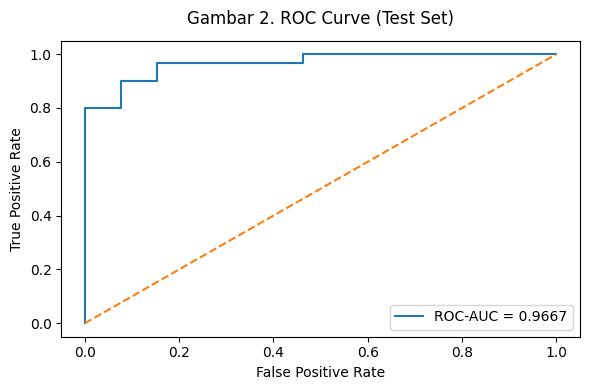

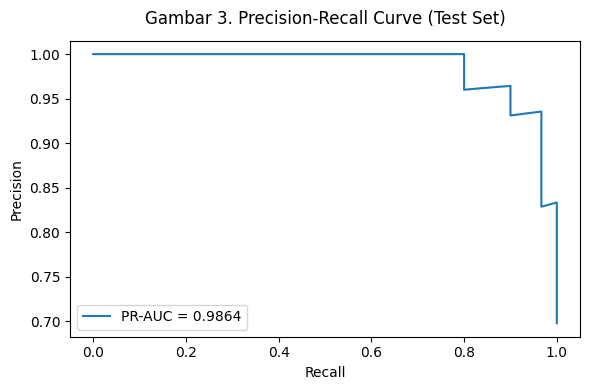

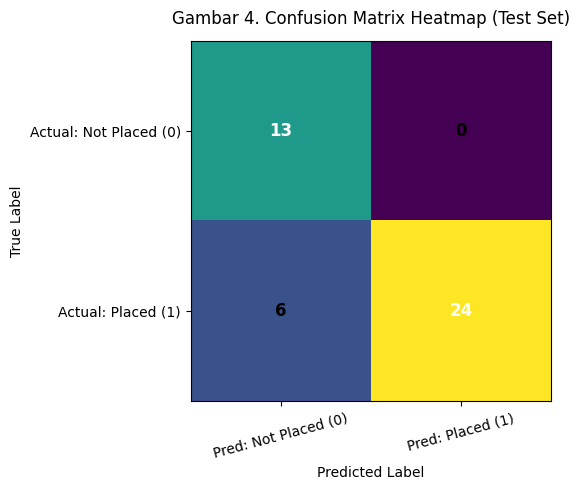

In [6]:
# ============================================================
# 📌 CELL 6 — Evaluasi Model Terbaik pada Test Set
# ============================================================

import numpy as np
import pandas as pd
from IPython.display import display, HTML

from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt

display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 6 — Evaluasi Model (Test Set)</h2>
<p style="margin-top:0; color:#555;">
Mengukur performa model terbaik pada data uji menggunakan metrik dan visualisasi evaluasi.
</p>
<hr>
"""))

# Probabilitas dan prediksi kelas
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Metrik utama
metrics = {
    "ROC-AUC": roc_auc_score(y_test, y_proba),
    "PR-AUC (Avg Precision)": average_precision_score(y_test, y_proba),
    "F1-score": f1_score(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred)
}

metrics_df = pd.DataFrame({
    "Metrik": list(metrics.keys()),
    "Nilai": [round(v, 4) for v in metrics.values()]
})

display(HTML("<h3 style='margin:12px 0 6px 0;'>📌 Ringkasan Metrik Evaluasi</h3>"))
display(
    metrics_df.style
      .hide(axis="index")
      .set_caption("Tabel 12. Performa Model pada Test Set")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#f1f5f9"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #cbd5e1"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #cbd5e1"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Actual: Not Placed (0)", "Actual: Placed (1)"],
    columns=["Pred: Not Placed (0)", "Pred: Placed (1)"]
)

display(HTML("<h3 style='margin:14px 0 6px 0;'>🧾 Confusion Matrix</h3>"))
display(
    cm_df.style
      .set_caption("Tabel 13. Confusion Matrix (Test Set)")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#fef3c7"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #f59e0b"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #f59e0b"), ("padding", "10px"),
                     ("color", "#111"), ("font-size", "14px")]}
      ])
)

# Classification report (ditampilkan dalam tabel agar rapi)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T.reset_index().rename(columns={"index": "Label"})
report_df = report_df[["Label", "precision", "recall", "f1-score", "support"]]
report_df["precision"] = report_df["precision"].round(4)
report_df["recall"] = report_df["recall"].round(4)
report_df["f1-score"] = report_df["f1-score"].round(4)
report_df["support"] = report_df["support"].astype(int)

display(HTML("<h3 style='margin:14px 0 6px 0;'>📄 Classification Report</h3>"))
display(
    report_df.style
      .hide(axis="index")
      .set_caption("Tabel 14. Classification Report (Test Set)")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#ecfeff"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #06b6d4"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #06b6d4"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# Kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.title("Gambar 2. ROC Curve (Test Set)", fontsize=12, pad=12)
plt.plot(fpr, tpr, label=f"ROC-AUC = {metrics['ROC-AUC']:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Kurva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.title("Gambar 3. Precision-Recall Curve (Test Set)", fontsize=12, pad=12)
plt.plot(recall, precision, label=f"PR-AUC = {metrics['PR-AUC (Avg Precision)']:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

display(HTML("""
<hr>
<p style="color:#555; margin-top:0;">
Tahap berikutnya: interpretasi kontribusi variabel menggunakan koefisien Logistic Regression dan odds ratio (exp(coef)).
</p>
"""))


# ============================================================
# 📌 Tambahan Cell 6 — Confusion Matrix Heatmap
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix

display(HTML("""
<h3 style="margin:14px 0 6px 0;">🔥 Confusion Matrix Heatmap</h3>
"""))

cm = confusion_matrix(y_test, y_pred)

labels = ["Not Placed (0)", "Placed (1)"]

plt.figure(figsize=(6, 5))
plt.title("Gambar 4. Confusion Matrix Heatmap (Test Set)", fontsize=12, pad=12)

im = plt.imshow(cm, interpolation="nearest")
plt.xticks([0, 1], [f"Pred: {l}" for l in labels], rotation=15)
plt.yticks([0, 1], [f"Actual: {l}" for l in labels])

# Tampilkan angka di setiap kotak
threshold = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > threshold else "black",
            fontsize=12, fontweight="bold"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



Fitur,Koefisien,Odds Ratio
Nilai rata-rata SMP,1.9804,7.2453
IPK,1.0802,2.9454
Pengalaman kerja sebelum lulus = Yes,1.0151,2.7596
Program studi sarjana = Comm&Mgmt,0.7504,2.1178
Nilai rata-rata SMA,0.7157,2.0457
Lembaga pendidikan kelas 12 = Internasional,0.6684,1.9510
Jenis Kelamin = M,0.6667,1.9478
Lembaga pendidikan kelas 10 = Internasional,0.6322,1.8817
Lembaga pendidikan kelas 12 = Negeri,0.5441,1.7231
Jurusan saat SMA = Arts,0.5349,1.7073


Fitur,Koefisien,Odds Ratio
Nilai rata-rata pascasarjana,-1.1010,0.3325
Lembaga pendidikan kelas 12 = Swasta,-0.8935,0.4092
Pengalaman kerja sebelum lulus = No,-0.6961,0.4985
Lembaga pendidikan kelas 10 = Negeri,-0.6615,0.5161
Program studi sarjana = Sci&Tech,-0.4444,0.6412
Jenis Kelamin = F,-0.3477,0.7063
Jurusan saat SMA = Science,-0.2496,0.7791
Nilai tes kemampuan kerja,-0.1979,0.8205


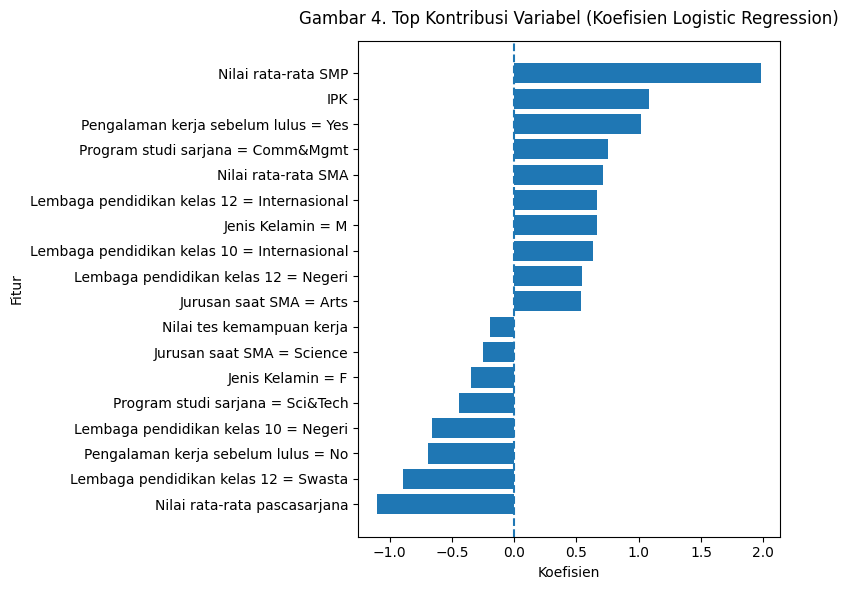

In [7]:
# ============================================================
# 📌 CELL 7 — Interpretasi Model: Koefisien & Odds Ratio
# ============================================================

import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 7 — Kontribusi Variabel (Koefisien & Odds Ratio)</h2>
<p style="margin-top:0; color:#555;">
Mengambil koefisien Logistic Regression dari pipeline dan mengubahnya menjadi odds ratio untuk interpretasi.
</p>
<hr>
"""))

preproc = best_model.named_steps["preprocess"]
clf = best_model.named_steps["classifier"]

# Mengambil nama fitur setelah preprocessing
try:
    feature_names = preproc.get_feature_names_out()
except Exception:
    num_out = [f"num__{c}" for c in numeric_features]
    cat_pipe = preproc.named_transformers_["cat"]
    ohe = cat_pipe.named_steps["onehot"]
    cat_out = ohe.get_feature_names_out(categorical_features)
    cat_out = [f"cat__{c}" for c in cat_out]
    feature_names = np.array(num_out + cat_out)

coefs = clf.coef_.ravel()

coef_df = pd.DataFrame({
    "raw_feature": feature_names.astype(str),
    "Koefisien": coefs
})

coef_df["Odds Ratio"] = np.exp(coef_df["Koefisien"])
coef_df["|Koefisien|"] = coef_df["Koefisien"].abs()

# Membuat nama fitur yang lebih mudah dibaca
def prettify_feature(raw_name, cat_feature_list):
    name = str(raw_name).replace("num__", "").replace("cat__", "").replace("onehot__", "")

    for c in cat_feature_list:
        prefix = f"{c}_"
        if name.startswith(prefix):
            level = name[len(prefix):]
            return f"{c} = {level}"

    return name

coef_df["Fitur"] = coef_df["raw_feature"].apply(lambda x: prettify_feature(x, categorical_features))

display(HTML("<h3 style='margin:12px 0 6px 0;'>📌 Ringkasan Kontribusi Variabel</h3>"))
display(HTML("""
<p style="margin-top:0; color:#333;">
Koefisien positif meningkatkan peluang <b>Placed</b>, sedangkan koefisien negatif menurunkan peluang <b>Placed</b>.
Odds Ratio (>1 menaikkan odds, <1 menurunkan odds).
</p>
"""))

# Top 10 positif dan negatif (dengan filter tanda koefisien)
top_pos = (coef_df[coef_df["Koefisien"] > 0]
           .sort_values("Koefisien", ascending=False)
           .head(10)
           .copy())

top_neg = (coef_df[coef_df["Koefisien"] < 0]
           .sort_values("Koefisien", ascending=True)
           .head(10)
           .copy())

display(HTML("<h3 style='margin:14px 0 6px 0;'>⬆️ Top 10 Variabel yang Menaikkan Peluang Placed</h3>"))
display(
    top_pos[["Fitur", "Koefisien", "Odds Ratio"]]
      .style.hide(axis="index")
      .format({"Koefisien": "{:.4f}", "Odds Ratio": "{:.4f}"})
      .set_caption("Tabel 15. Top 10 Koefisien Positif")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#dcfce7"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #86efac"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #86efac"), ("padding", "8px"), ("color", "#222")]}
      ])
)

display(HTML("<h3 style='margin:14px 0 6px 0;'>⬇️ Top 10 Variabel yang Menurunkan Peluang Placed</h3>"))
display(
    top_neg[["Fitur", "Koefisien", "Odds Ratio"]]
      .style.hide(axis="index")
      .format({"Koefisien": "{:.4f}", "Odds Ratio": "{:.4f}"})
      .set_caption("Tabel 16. Top 10 Koefisien Negatif")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#fee2e2"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #fca5a5"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #fca5a5"), ("padding", "8px"), ("color", "#222")]}
      ])
)

# Visualisasi kontribusi: gabungan top negatif dan positif
plot_df = pd.concat([top_neg, top_pos], axis=0).copy()
plot_df = plot_df.sort_values("Koefisien")

plt.figure(figsize=(8, 6))
plt.title("Gambar 4. Top Kontribusi Variabel (Koefisien Logistic Regression)", fontsize=12, pad=12)
plt.barh(plot_df["Fitur"], plot_df["Koefisien"])
plt.axvline(0, linestyle="--")
plt.xlabel("Koefisien")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

display(HTML("""
<hr>
<p style="color:#555; margin-top:0;">
Tahap berikutnya: menyusun tabel final kontribusi variabel (Top N berdasarkan |koefisien|) untuk dimasukkan ke pembahasan.
</p>
"""))


In [8]:
# ============================================================
# 📌 CELL 8 — Tabel Final Kontribusi Variabel untuk Laporan
# ============================================================

import numpy as np
import pandas as pd
from IPython.display import display, HTML

display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 8 — Tabel Kontribusi Variabel (Siap untuk Laporan)</h2>
<p style="margin-top:0; color:#555;">
Tabel variabel kunci: koefisien, odds ratio, arah pengaruh, dan interpretasi singkat.
</p>
<hr>
"""))

# Menyusun coef_df jika belum tersedia
if "coef_df" not in globals():
    preproc = best_model.named_steps["preprocess"]
    clf = best_model.named_steps["classifier"]

    try:
        feature_names = preproc.get_feature_names_out()
    except Exception:
        num_out = [f"num__{c}" for c in numeric_features]
        cat_pipe = preproc.named_transformers_["cat"]
        ohe = cat_pipe.named_steps["onehot"]
        cat_out = ohe.get_feature_names_out(categorical_features)
        cat_out = [f"cat__onehot__{c}" for c in cat_out]
        feature_names = np.array(num_out + cat_out)

    coefs = clf.coef_.ravel()

    coef_df = pd.DataFrame({
        "raw_feature": feature_names.astype(str),
        "Koefisien": coefs
    })

# Membersihkan nama fitur dan memisahkan variabel vs kategori
def parse_feature(raw_name, cat_feature_list):
    name = str(raw_name)
    name = name.replace("num__", "").replace("cat__", "").replace("onehot__", "")

    var_name = name
    level = None
    feature_type = "Numerik"

    for c in cat_feature_list:
        prefix = f"{c}_"
        if name.startswith(prefix):
            var_name = c
            level = name[len(prefix):]
            feature_type = "Kategorikal"
            break

    if feature_type == "Numerik":
        var_name = name

    return var_name, level, feature_type

parsed = coef_df["raw_feature"].apply(lambda x: parse_feature(x, categorical_features))
coef_df["Variabel"] = parsed.apply(lambda t: t[0])
coef_df["Kategori"] = parsed.apply(lambda t: t[1])
coef_df["Jenis"] = parsed.apply(lambda t: t[2])

# Membuat nama fitur yang enak dibaca
coef_df["Fitur"] = np.where(
    coef_df["Jenis"] == "Kategorikal",
    coef_df["Variabel"].astype(str) + " = " + coef_df["Kategori"].astype(str),
    coef_df["Variabel"].astype(str)
)

# Odds ratio dan ranking
coef_df["Odds Ratio"] = np.exp(coef_df["Koefisien"])
coef_df["|Koefisien|"] = coef_df["Koefisien"].abs()
coef_df["Arah"] = np.where(coef_df["Koefisien"] >= 0, "Positif", "Negatif")

# Pilih top N berdasarkan kontribusi terbesar
TOP_N = 12
top_features = coef_df.sort_values("|Koefisien|", ascending=False).head(TOP_N).copy()

# Interpretasi singkat berbasis odds ratio
def interpret_row(row):
    feat = row["Fitur"]
    coef = row["Koefisien"]
    orv = row["Odds Ratio"]

    if coef >= 0:
        direction = "meningkatkan"
        or_text = f"odds Placed sekitar {orv:.2f}x"
    else:
        direction = "menurunkan"
        or_text = f"odds Placed menjadi sekitar {orv:.2f}x"

    if row["Jenis"] == "Kategorikal":
        return f"Kategori ini cenderung {direction} peluang Placed ({or_text}) dibanding kategori acuan."
    else:
        return f"Kenaikan 1 SD pada variabel ini cenderung {direction} peluang Placed ({or_text})."

top_features["Interpretasi singkat"] = top_features.apply(interpret_row, axis=1)

# Tabel final untuk laporan
final_table = top_features[[
    "Fitur", "Jenis", "Koefisien", "Odds Ratio", "Arah", "Interpretasi singkat"
]].copy()

final_table["Koefisien"] = final_table["Koefisien"].round(4)
final_table["Odds Ratio"] = final_table["Odds Ratio"].round(4)

# Ringkasan jumlah positif/negatif
pos_count = int((final_table["Arah"] == "Positif").sum())
neg_count = int((final_table["Arah"] == "Negatif").sum())

display(HTML("<h3 style='margin:12px 0 6px 0;'>📌 Variabel Kunci Berdasarkan Kontribusi Model</h3>"))
display(
    final_table.style
      .hide(axis="index")
      .set_caption(f"Tabel 17. Top {TOP_N} Variabel Paling Berkontribusi (Regularized Logistic Regression)")
      .set_table_styles([
          {"selector": "caption",
           "props": [("caption-side", "top"), ("font-size", "14px"),
                     ("font-weight", "600"), ("color", "#222"), ("padding", "6px 0")]},
          {"selector": "th",
           "props": [("background-color", "#f8fafc"), ("color", "#111"),
                     ("font-weight", "700"), ("border", "1px solid #e2e8f0"), ("padding", "8px")]},
          {"selector": "td",
           "props": [("border", "1px solid #e2e8f0"), ("padding", "8px"),
                     ("color", "#222"), ("vertical-align", "top")]}
      ])
)

display(HTML("<h3 style='margin:14px 0 6px 0;'>📝 Ringkasan untuk Pembahasan</h3>"))
display(HTML(f"""
<ul style="margin-top:0; color:#333;">
  <li>Dari <b>Top {TOP_N}</b> variabel kunci, terdapat <b>{pos_count}</b> variabel dengan pengaruh positif dan <b>{neg_count}</b> variabel dengan pengaruh negatif.</li>
  <li>Interpretasi numerik dibaca per <b>kenaikan 1 standar deviasi</b> karena fitur numerik distandardisasi.</li>
  <li>Interpretasi kategorikal dibaca relatif terhadap <b>kategori acuan</b> pada One-Hot Encoding.</li>
</ul>
<hr>
"""))

# Menyimpan tabel
final_table.to_csv("Tabel_Kontribusi_Variabel_Top.csv", index=False)
display(HTML("""
<p style="color:#555; margin-top:0;">
File tabel tersimpan sebagai: <b>Tabel_Kontribusi_Variabel_Top.csv</b>
</p>
"""))


Fitur,Jenis,Koefisien,Odds Ratio,Arah,Interpretasi singkat
Nilai rata-rata SMP,Numerik,1.980400,7.245300,Positif,Kenaikan 1 SD pada variabel ini cenderung meningkatkan peluang Placed (odds Placed sekitar 7.25x).
Nilai rata-rata pascasarjana,Numerik,-1.101000,0.332500,Negatif,Kenaikan 1 SD pada variabel ini cenderung menurunkan peluang Placed (odds Placed menjadi sekitar 0.33x).
IPK,Numerik,1.080200,2.945400,Positif,Kenaikan 1 SD pada variabel ini cenderung meningkatkan peluang Placed (odds Placed sekitar 2.95x).
Pengalaman kerja sebelum lulus = Yes,Kategorikal,1.015100,2.759600,Positif,Kategori ini cenderung meningkatkan peluang Placed (odds Placed sekitar 2.76x) dibanding kategori acuan.
Lembaga pendidikan kelas 12 = Swasta,Kategorikal,-0.893500,0.409200,Negatif,Kategori ini cenderung menurunkan peluang Placed (odds Placed menjadi sekitar 0.41x) dibanding kategori acuan.
Program studi sarjana = Comm&Mgmt,Kategorikal,0.750400,2.117800,Positif,Kategori ini cenderung meningkatkan peluang Placed (odds Placed sekitar 2.12x) dibanding kategori acuan.
Nilai rata-rata SMA,Numerik,0.715700,2.045700,Positif,Kenaikan 1 SD pada variabel ini cenderung meningkatkan peluang Placed (odds Placed sekitar 2.05x).
Pengalaman kerja sebelum lulus = No,Kategorikal,-0.696100,0.498500,Negatif,Kategori ini cenderung menurunkan peluang Placed (odds Placed menjadi sekitar 0.50x) dibanding kategori acuan.
Lembaga pendidikan kelas 12 = Internasional,Kategorikal,0.668400,1.951000,Positif,Kategori ini cenderung meningkatkan peluang Placed (odds Placed sekitar 1.95x) dibanding kategori acuan.
Jenis Kelamin = M,Kategorikal,0.666700,1.947800,Positif,Kategori ini cenderung meningkatkan peluang Placed (odds Placed sekitar 1.95x) dibanding kategori acuan.


In [9]:
# ============================================================
# 📌 BAGIAN 9 — Insight & Rekomendasi Praktis (Versi Dirapikan)
# ============================================================

import numpy as np
import pandas as pd
from IPython.display import display, HTML

display(HTML("""
<h2 style="margin:0; padding:10px 0;">📌 Bagian 9 — Insight & Rekomendasi Praktis</h2>
<p style="margin-top:0; color:#555;">
Menyusun rekomendasi berbasis variabel kunci dan jenis kesalahan model, tanpa klaim sebab-akibat.
</p>
<hr>
"""))

if "final_table" not in globals():
    raise ValueError("final_table belum tersedia. Jalankan Bagian 8 terlebih dahulu.")

# Tambahkan kolom prioritas berbasis |koefisien|
ft = final_table.copy()
if "|Koefisien|" not in ft.columns:
    ft["|Koefisien|"] = ft["Koefisien"].abs()

q1, q2 = ft["|Koefisien|"].quantile([0.33, 0.66]).values
def priority(abscoef):
    if abscoef >= q2:
        return "Tinggi"
    elif abscoef >= q1:
        return "Sedang"
    return "Rendah"

ft["Prioritas"] = ft["|Koefisien|"].apply(priority)

# Kategori aksiable (lebih ketat)
def actionability(feature_name):
    f = str(feature_name).lower()
    if "pengalaman kerja" in f or "nilai tes kemampuan kerja" in f or f == "ipk":
        return "Aksiable (langsung bisa diintervensi)"
    if "nilai rata-rata smp" in f or "nilai rata-rata sma" in f:
        return "Aksiable (dukungan akademik)"
    if "jenis kelamin" in f:
        return "Sensitif (audit fairness)"
    return "Kurang aksiable (lebih historis)"

ft["Kategori rekomendasi"] = ft["Fitur"].apply(actionability)

# Rekomendasi spesifik per fitur (lebih “berisi”)
def make_reco(row):
    f = row["Fitur"]
    arah = row["Arah"]

    fl = str(f).lower()

    if "pengalaman kerja sebelum lulus" in fl:
        if "yes" in fl:
            return "Skalakan program magang/kerja praktik; jadikan jalur utama peningkatan employability sebelum lulus."
        if "no" in fl:
            return "Prioritaskan mahasiswa tanpa pengalaman kerja untuk magang wajib, mentoring karier, dan simulasi rekrutmen."

    if "nilai tes kemampuan kerja" in fl:
        return "Bangun program pelatihan employability terstruktur (latihan tes, CV clinic, interview, problem solving) dengan evaluasi berkala."

    if fl == "ipk":
        return "Terapkan early support akademik (tutoring/clinic) untuk mahasiswa dengan IPK rendah, fokus pada mata kuliah bottleneck."

    if "nilai rata-rata smp" in fl or "nilai rata-rata sma" in fl:
        return "Gunakan sebagai sinyal awal pemetaan kebutuhan dukungan akademik; intervensi berupa bimbingan, remedial, dan monitoring progres."

    if "nilai rata-rata pascasarjana" in fl:
        return "Hindari interpretasi kausal; gunakan sebagai indikator risiko dan lakukan analisis lanjutan (korelasi, multikolinearitas, segmentasi)."

    if "jenis kelamin" in fl:
        return "Gunakan untuk audit bias model (mis. perbandingan error rate antar gender), bukan untuk intervensi individual."

    if "lembaga pendidikan" in fl or "jurusan" in fl or "program studi" in fl:
        return "Gunakan untuk pemetaan risiko tingkat kelompok; rekomendasi bersifat programatik (bridging, pelatihan tambahan), bukan keputusan per individu."

    return "Gunakan sebagai indikator pemetaan risiko dan bahan evaluasi kebijakan pendampingan."

ft["Rekomendasi"] = ft.apply(make_reco, axis=1)

# Tabel rekomendasi akhir
reco_tbl = ft[["Fitur", "Arah", "Odds Ratio", "Prioritas", "Kategori rekomendasi", "Rekomendasi"]].copy()
reco_tbl["Odds Ratio"] = reco_tbl["Odds Ratio"].round(2)

display(HTML("<h3 style='margin:12px 0 6px 0;'>📌 Insight dan Rekomendasi Praktis</h3>"))
display(
    reco_tbl.style
      .hide(axis="index")
      .set_caption("Tabel 18. Insight dan Rekomendasi Praktis (Berbasis Hasil Model)")
      .set_table_styles([
          {"selector":"caption","props":[("caption-side","top"),("font-size","14px"),("font-weight","600"),("color","#222"),("padding","6px 0")]},
          {"selector":"th","props":[("background-color","#f8fafc"),("color","#111"),("font-weight","700"),("border","1px solid #e2e8f0"),("padding","8px")]},
          {"selector":"td","props":[("border","1px solid #e2e8f0"),("padding","8px"),("vertical-align","top")]}
      ])
)

# Konsekuensi singkat jika sinyal risiko diabaikan
display(HTML("""
<hr>
<h3 style="margin:12px 0 6px 0;">📌 Konsekuensi Jika Sinyal Risiko Diabaikan</h3>
<ul style="margin-top:0; color:#333; line-height:1.6;">
  <li>Intervensi terlambat: mahasiswa berisiko baru terdeteksi mendekati kelulusan saat ruang perbaikan sudah sempit.</li>
  <li>Efisiensi rendah: biaya program pembinaan naik karena harus mengejar ketertinggalan dalam waktu singkat.</li>
  <li>Risiko reputasi: penurunan outcome placement dapat berdampak pada persepsi kualitas institusi.</li>
  <li>Interpretasi hasil tetap bersifat asosiasi; rekomendasi ditujukan untuk prioritas pendampingan, bukan klaim sebab-akibat.</li>
</ul>
"""))

reco_tbl.to_csv("Tabel_18_Rekomendasi_Praktis.csv", index=False)


Fitur,Arah,Odds Ratio,Prioritas,Kategori rekomendasi,Rekomendasi
Nilai rata-rata SMP,Positif,7.250000,Tinggi,Aksiable (dukungan akademik),"Gunakan sebagai sinyal awal pemetaan kebutuhan dukungan akademik; intervensi berupa bimbingan, remedial, dan monitoring progres."
Nilai rata-rata pascasarjana,Negatif,0.330000,Tinggi,Kurang aksiable (lebih historis),"Hindari interpretasi kausal; gunakan sebagai indikator risiko dan lakukan analisis lanjutan (korelasi, multikolinearitas, segmentasi)."
IPK,Positif,2.950000,Tinggi,Aksiable (langsung bisa diintervensi),"Terapkan early support akademik (tutoring/clinic) untuk mahasiswa dengan IPK rendah, fokus pada mata kuliah bottleneck."
Pengalaman kerja sebelum lulus = Yes,Positif,2.760000,Tinggi,Aksiable (langsung bisa diintervensi),Skalakan program magang/kerja praktik; jadikan jalur utama peningkatan employability sebelum lulus.
Lembaga pendidikan kelas 12 = Swasta,Negatif,0.410000,Sedang,Kurang aksiable (lebih historis),"Gunakan untuk pemetaan risiko tingkat kelompok; rekomendasi bersifat programatik (bridging, pelatihan tambahan), bukan keputusan per individu."
Program studi sarjana = Comm&Mgmt,Positif,2.120000,Sedang,Kurang aksiable (lebih historis),"Gunakan untuk pemetaan risiko tingkat kelompok; rekomendasi bersifat programatik (bridging, pelatihan tambahan), bukan keputusan per individu."
Nilai rata-rata SMA,Positif,2.050000,Sedang,Aksiable (dukungan akademik),"Gunakan sebagai sinyal awal pemetaan kebutuhan dukungan akademik; intervensi berupa bimbingan, remedial, dan monitoring progres."
Pengalaman kerja sebelum lulus = No,Negatif,0.500000,Sedang,Aksiable (langsung bisa diintervensi),"Prioritaskan mahasiswa tanpa pengalaman kerja untuk magang wajib, mentoring karier, dan simulasi rekrutmen."
Lembaga pendidikan kelas 12 = Internasional,Positif,1.950000,Rendah,Kurang aksiable (lebih historis),"Gunakan untuk pemetaan risiko tingkat kelompok; rekomendasi bersifat programatik (bridging, pelatihan tambahan), bukan keputusan per individu."
Jenis Kelamin = M,Positif,1.950000,Rendah,Sensitif (audit fairness),"Gunakan untuk audit bias model (mis. perbandingan error rate antar gender), bukan untuk intervensi individual."
